# Final Analysis Pharmaceuticals
#### Based on the data obtained from the experiment of different drugs for the treatment of Tumor volume reduction we can summarize the following conclusions.  
* The most effective drug was  Capomulin with a ~19% Tumor volume reduction. It also has the lowest Metastatic Spread. The survival rate was ~85% for 45 days. 
* We can state this is statistical significant survival rates since the placebo and the other drugs in the experiment behave similarly. 
* Based on the error bars we can also conclude that this analysis counts for variability and can conclude that Capomulin is the most effective drug to treat Tumor volume in this data set.

In [4]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
#added all reading all the data together and mergin both dataframes
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
total_data = pd.merge(clinical_data, mouse_data,on= "Mouse ID")
total_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#store the Data frame into a groupby (gb) and get the mean
#we also reset the index so we can get the new indexes
tumor_volume_gb = total_data[['Drug','Timepoint','Tumor Volume (mm3)']]
tumor_volume_gb = tumor_volume_gb.groupby(['Drug','Timepoint'])
tumor_volume_df = tumor_volume_gb.mean()
tumor_volume_df = tumor_volume_df.reset_index()
#making sure than the numbers imported are different
tumor_volume_df.tail()



,Drug,Timepoint,Tumor Volume (mm3)
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692
99,Zoniferol,45,65.960888


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# we used the same method above to store the SEM that we inported before

sem_tumor_volume = tumor_volume_gb.sem()
# Convert to DataFrame
sem_tumor_volume = sem_tumor_volume.reset_index()
sem_tumor_volume = sem_tumor_volume.rename(columns={'Tumor Volume (mm3)':'SEM Tumor Volume (mm3)'})
# Preview DataFrame
sem_tumor_volume



,Drug,Timepoint,SEM Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [7]:
# Minor Data Munging to Re-Format the Data Frames
# created a data structure to reshape the date in the desired form
drugs = ['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']
reshaped_table_tumor=tumor_volume_df.copy()
reshaped_table_tumor1 = reshaped_table_tumor.loc[reshaped_table_tumor['Drug'] =='Capomulin']
reshaped_table_tumor1 = reshaped_table_tumor1[['Timepoint','Tumor Volume (mm3)']]
reshaped_table_tumor1 = reshaped_table_tumor1.set_index('Timepoint').rename(columns={'Tumor Volume (mm3)':'Capomulin'})

# use a for loop to populate the data with the desired data
for onedrug in drugs:
    reshaped_table_tumor2=reshaped_table_tumor.loc[reshaped_table_tumor['Drug'] == onedrug].set_index('Timepoint')
    reshaped_table_tumor1[onedrug]=reshaped_table_tumor2['Tumor Volume (mm3)']
    reshaped_table_tumor1= reshaped_table_tumor1.rename(columns={'Tumor Volume (mm3)':onedrug})
    reshaped_table_tumor2=[]
reshaped_table_tumor1



,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [8]:
# using the same method for the table above to get the values of SEM and also populating the table 
reshaped_sem_table_tumor=sem_tumor_volume.copy()
reshaped_sem_table_tumor1 = reshaped_sem_table_tumor.loc[reshaped_sem_table_tumor['Drug'] =='Capomulin']
reshaped_sem_table_tumor1 = reshaped_sem_table_tumor1[['Timepoint','SEM Tumor Volume (mm3)']]
reshaped_sem_table_tumor1 = reshaped_sem_table_tumor1.set_index('Timepoint').rename(columns={'SEM Tumor Volume (mm3)':'Capomulin SEM'})



for onedrug in drugs:
    reshaped_sem_table_tumor2=reshaped_sem_table_tumor.loc[reshaped_sem_table_tumor['Drug'] == onedrug].set_index('Timepoint')
    reshaped_sem_table_tumor1[onedrug+" SEM"]=reshaped_sem_table_tumor2['SEM Tumor Volume (mm3)']
    reshaped_sem_table_tumor1= reshaped_sem_table_tumor1.rename(columns={'SEM Tumor Volume (mm3)':onedrug+ " SEM"})
    reshaped_sem_table_tumor2=[]
reshaped_sem_table_tumor1

,Capomulin SEM,Ceftamin SEM,Infubinol SEM,Ketapril SEM,Naftisol SEM,Placebo SEM,Propriva SEM,Ramicane SEM,Stelasyn SEM,Zoniferol SEM
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


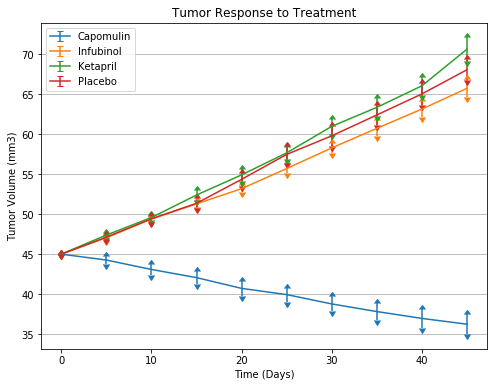

In [9]:
# Generate the Plot (with Error Bars)
fig = plt.figure(figsize=(8,6))
time = reshaped_table_tumor1.index
drugs2=['Capomulin','Infubinol','Ketapril','Placebo']
for onedrug in drugs2:
    plt.errorbar(time, reshaped_table_tumor1[onedrug],yerr=reshaped_sem_table_tumor1[onedrug+ ' SEM'], label= onedrug,uplims=True, lolims=True)

plt.legend(loc='best')

plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.grid(True, axis= 'y')
# Save the Figure

plt.savefig("Tumor_Response_to_Treatment.png")


## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# we use the same method than before to create a values
metas_gb = total_data[['Drug','Timepoint','Metastatic Sites']]
metas_gb = metas_gb.groupby(['Drug','Timepoint'])
metas_df = metas_gb.mean().reset_index()
metas_df




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metas_sem_df = metas_gb.sem().reset_index()
metas_sem_df


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [12]:
# Minor Data Munging to Re-Format the Data Frames

metas_table= metas_df.loc[metas_df['Drug']=='Capomulin'].set_index('Timepoint')
metas_table = metas_table[['Metastatic Sites']].rename(columns={'Metastatic Sites':'Capomulin'})
for onedrug in drugs:
    test_table = metas_df.loc[metas_df['Drug']==onedrug].set_index('Timepoint')
    metas_table[onedrug]=test_table['Metastatic Sites'].rename(columns={'Metastatic Sites':onedrug})
metas_table
#SEM table with Metastatic Sites

metas_sem_table= metas_sem_df.loc[metas_sem_df['Drug']=='Capomulin'].set_index('Timepoint')
metas_sem_table = metas_sem_table[['Metastatic Sites']].rename(columns={'Metastatic Sites':'Capomulin SEM'})
for onedrug in drugs:
    test_sem_table = metas_sem_df.loc[metas_sem_df['Drug']==onedrug].set_index('Timepoint')
    metas_sem_table[onedrug+' SEM']=test_sem_table['Metastatic Sites'].rename(columns={'Metastatic Sites':onedrug+' SEM'})
metas_sem_table


,Capomulin SEM,Ceftamin SEM,Infubinol SEM,Ketapril SEM,Naftisol SEM,Placebo SEM,Propriva SEM,Ramicane SEM,Stelasyn SEM,Zoniferol SEM
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


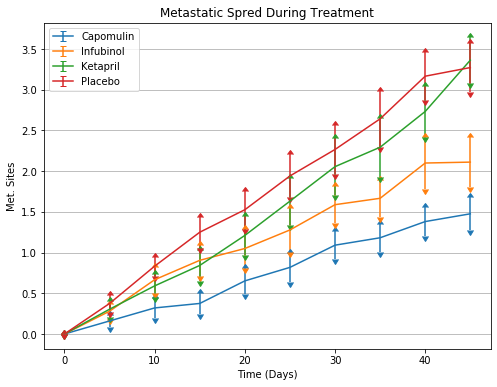

In [13]:
# Generate the Plot (with Error Bars)

fig2 = plt.figure(figsize=(8,6))
time = reshaped_table_tumor1.index

for onedrug in drugs2:
    plt.errorbar(time, metas_table[onedrug],yerr=metas_sem_table[onedrug+ ' SEM'], label= onedrug,uplims=True, lolims=True)

plt.legend(loc='best')

plt.xlabel('Time (Days)')
plt.ylabel('Met. Sites')
plt.title('Metastatic Spred During Treatment')
plt.grid(True, axis= 'y')
# Save the Figure

plt.savefig("Metastatic_Spred_During_Treatment.png")


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate_df= metas_gb.count().reset_index()
survival_rate_df
survival_table = survival_rate_df.loc[survival_rate_df['Drug']=='Capomulin'].set_index('Timepoint')
survival_table = survival_table[['Metastatic Sites']].rename(columns={'Metastatic Sites':'Capomulin'})
# Preview DataFrame
for onedrug in drugs:
    test_table = survival_rate_df.loc[survival_rate_df['Drug']==onedrug].set_index('Timepoint')
    survival_table[onedrug]=test_table['Metastatic Sites']
survival_table
survival_table_percentages = survival_table.copy()
for onedrug in drugs:
    survival_table_percentages[onedrug]=round((survival_table_percentages[onedrug]/survival_table[onedrug][0])* 100,1)
survival_table_percentages

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.2,100.0,96.2,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.5,96.0,88.5,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.4,96.0,88.5,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.4,92.0,80.8,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.8,92.0,73.1,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.0,92.0,69.2,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.5,84.0,61.5,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.6,80.0,46.2,56.0


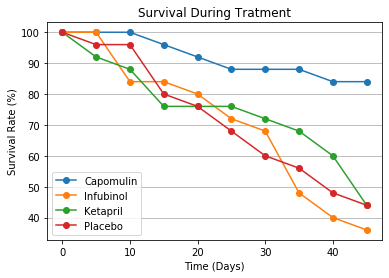

In [16]:
# Generate the Plot (Accounting for percentages)
fig3 = plt.figure()
time = reshaped_table_tumor1.index

for onedrug in drugs2:
    plt.plot(time, survival_table_percentages[onedrug],label= onedrug,marker="o")
plt.legend(loc='best')

plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Tratment')
plt.grid(True, axis= 'y')
plt.savefig("Survival_During_Treatment.png")

## Summary Bar Graph

In [17]:
change_tumor_size=pd.DataFrame(drugs)
change_tumor_size["Tumor Volume change %"]=[(reshaped_table_tumor1[onedrug][45]-reshaped_table_tumor1[onedrug][0])/reshaped_table_tumor1[onedrug][0]*100 for onedrug in drugs] 

bar_data = pd.DataFrame({'Volume':[-19.47,46.12,57.03,51.30],
                        'index':drugs2})
bar_data=bar_data.set_index('index')
bar_data.index

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object', name='index')

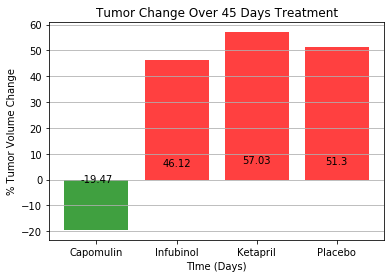

In [21]:
#ccreated the plot the with the values in bars
fig, ax = plt.subplots()
plt.title("Tumor Change Over 45 Days Treatment")
plt.xlabel("TIme (Days)")
plt.ylabel("% Tumor Volume Change")
bar_label= bar_data['Volume']

bar_plot = plt.bar(bar_data.index, bar_data['Volume'], color=('g','r','r','r'), alpha=0.75)

plt.grid(True, axis= 'y')

#defined a funtion to label the plot

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.1*height,
                bar_label[idx],
                ha='center', va='bottom')

autolabel(bar_plot)
plt.savefig("Tumor_Change_over_45_days_.png")
